<b>Author:</b> <a>Gurban Aliyev</a><br/>
<b>Last update:</b> 21/07/2019
</span>

<a id='top'></a>
# *Community Discovery (Networkx)*

This notebook contains functions of networkx used for community Discovery

## Table of Contents

1. [Community Discovery Algorithms](#cd)
    1. [K-Cliques](#kc)
    2. [Louvain](#lv)
    3. [Label Propagation](#lp)
    4. [Demon](#dm)
2. [Comparing partitions](#comparing)
    1. [Normalized Mutual Information (NMI)](#nmi)
    2. [NF1 score](#nf1)
3. [LFR: Synthetic networks with planted community structure](#lfr)

In [20]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from sklearn.metrics import normalized_mutual_info_score
from nf1 import NF1
import community
import community as louvain
from collections import defaultdict
from networkx.algorithms.community import LFR_benchmark_graph

When there is a problem in codes, it is better to use karate clubs network as our network spends more time

In [17]:
#g = nx.karate_club_graph()

g = nx.read_edgelist("C:\\homework\SNA\sna_li.csv", delimiter=",", nodetype=int)

This is how our network looks like:

C:\Users\qrbal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


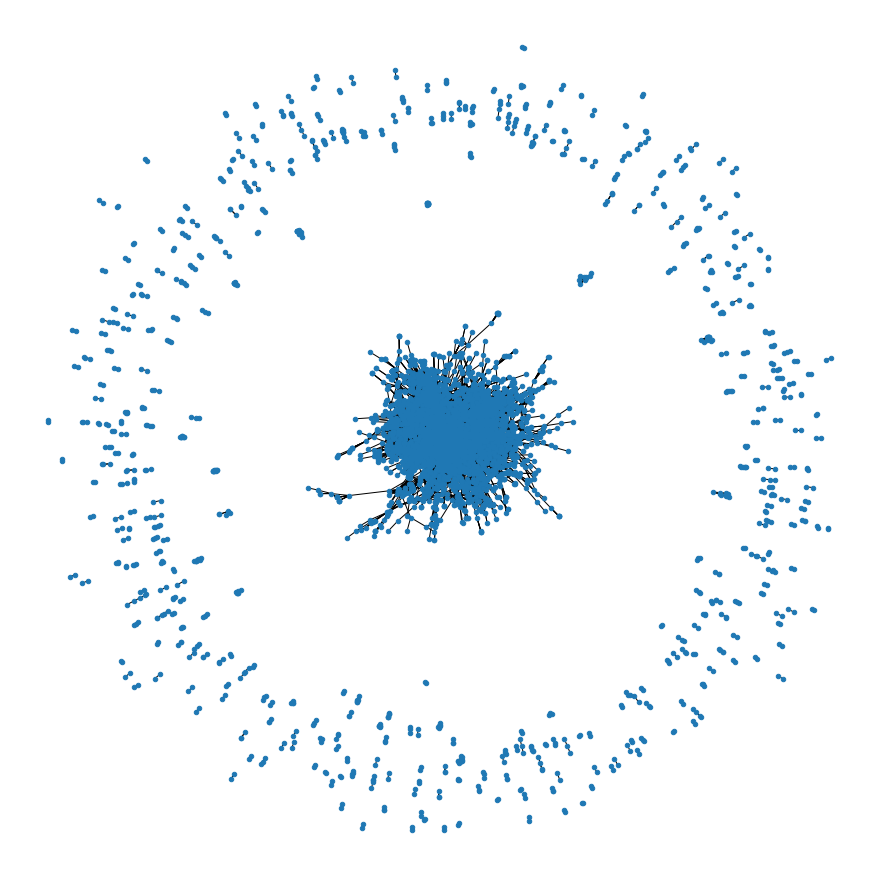

In [56]:
plt.figure(figsize=(12, 12))
nx.draw(g, with_labels=False, node_size=20, font_size=10)

<a id='cd'></a>
# 1. Community Discovery Algorithms ([to top](#top))

<a id='kc'></a>
### A. K-Cliques ([to top](#top))

In [19]:
from networkx.algorithms import community

kclique4 = list(community.k_clique_communities(g, 4))
kclique4 = [tuple(x) for x in kclique4]

[(0,
  1,
  3,
  8195,
  5,
  6,
  7,
  4,
  8201,
  10,
  8203,
  11,
  8205,
  14,
  15,
  16,
  8209,
  8210,
  8211,
  8213,
  24,
  8217,
  8219,
  29,
  30,
  32,
  8225,
  8226,
  8229,
  8231,
  8233,
  43,
  8236,
  47,
  8240,
  8239,
  56,
  8250,
  8251,
  8254,
  63,
  8257,
  8258,
  8262,
  8266,
  8271,
  80,
  8273,
  8272,
  8275,
  83,
  8276,
  8278,
  8279,
  86,
  8280,
  8284,
  93,
  94,
  8287,
  8288,
  8289,
  8290,
  8292,
  8293,
  102,
  8297,
  8298,
  8300,
  8302,
  8303,
  8304,
  8305,
  8306,
  8307,
  8308,
  8309,
  8310,
  8313,
  8314,
  123,
  8316,
  8317,
  8318,
  126,
  8322,
  133,
  8333,
  142,
  8336,
  8337,
  8338,
  8340,
  8342,
  151,
  150,
  153,
  8347,
  8349,
  8350,
  159,
  8354,
  163,
  164,
  8357,
  8355,
  167,
  169,
  8362,
  8363,
  170,
  172,
  174,
  8361,
  8369,
  178,
  8370,
  179,
  8373,
  8374,
  8376,
  8378,
  8379,
  8380,
  8381,
  8382,
  8383,
  8384,
  8385,
  8387,
  8388,
  8393,
  8394,
  8396,
  8

In [15]:
kclique8 = list(community.k_clique_communities(g, 8))
kclique8 = [tuple(x) for x in kclique8]

AttributeError: module 'community' has no attribute 'k_clique_communities'

C:\Users\qrbal\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


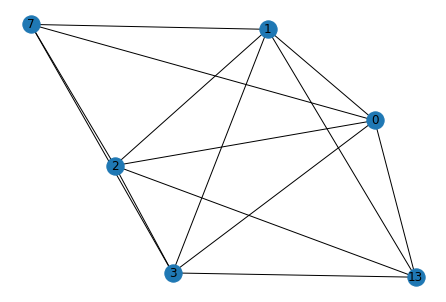

In [30]:
nx.draw(g.subgraph(kclique8[0]), with_labels=True)

<a id='lv'></a>
### B. Louvain ([to top](#top))

In [31]:
! pip install python-louvain

In [5]:
coms = louvain.best_partition(g, resolution=0.9, randomize=True)

# Reshaping the results to make them in the same format of the other CD algorithms
coms_to_node = defaultdict(list)
for n, c in coms.items():
    coms_to_node[c].append(n)

coms_louvain = [tuple(c) for c in coms_to_node.values()]
#coms_louvain

This is the network of Community 0 generated by Louvain algorithm

C:\Users\qrbal\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


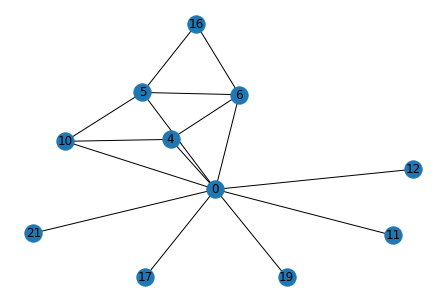

In [37]:
nx.draw(g.subgraph(coms_louvain[0]), with_labels=True)

<a id='lp'></a>
### C. Label Propagation ([to top](#top))

In [10]:
lp = list(community.label_propagation_communities(g))
lp = [tuple(x) for x in lp]

AttributeError: module 'community' has no attribute 'label_propagation_communities'

C:\Users\qrbal\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


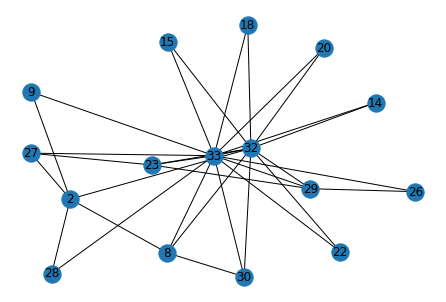

In [42]:
nx.draw(g.subgraph(lp[0]), with_labels=True)

<a id='dm'></a>
### D. Demon ([to top](#top))

In [45]:
! pip install demon

In [28]:
import demon as dm
d = dm.Demon(graph=g, min_community_size=6, epsilon=2.3)
coms_demon = d.execute()

Exec: 100%|████████████████████████


Time:  'execute' 554.77 sec
------------------------------------


C:\Users\qrbal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


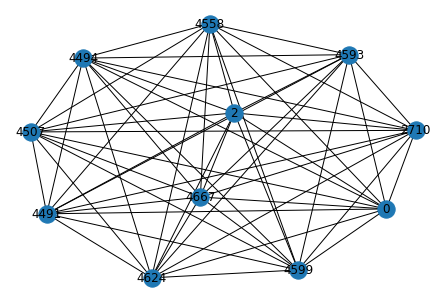

In [68]:
nx.draw(g.subgraph(coms_demon[0]), with_labels=True)

<a id='comparing'></a>
# 2. Comparing partitions ([to top](#top))

<a id='nmi'></a>
### A. Normalized Mutual Information (NMI) ([to top](#top))

In [33]:
from sklearn.metrics import normalized_mutual_info_score

In [32]:
def nmi_preprocess(partition):
    return [x[1] for x in sorted([(node,nid) for nid, cluster in enumerate(partition) for node in cluster], 
                                 key=lambda x: x[0])]

In [66]:
lp_labels = nmi_preprocess(lp)
louvain_labels = nmi_preprocess(coms_louvain)

In [67]:
normalized_mutual_info_score(lp_labels, louvain_labels)

C:\Users\qrbal\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7743749281340125

<a id='nf1'></a>
### B. NF1 score ([to top](#top))

In [47]:
# Label Propagation vs Louvain

nf = NF1(lp, coms_louvain)
results = nf.summary()

results

{'scores':                                Value
 Index                               
 Ground Truth Communities  451.000000
 Identified Communities    859.000000
 Community Ratio             1.904656
 Ground Truth Matched        1.000000
 Node Coverage               1.000000
 NF1                         0.279465,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0    0.01     1.0  0.532285      1.0  0.469183}

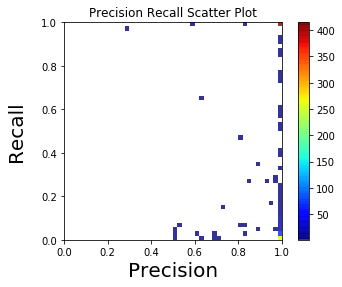

In [48]:
nf.plot()

In [49]:
# Label Propagation vs Demon

nf = NF1(lp, coms_demon)
results = nf.summary()

results

{'scores':                                 Value
 Index                                
 Ground Truth Communities  2057.000000
 Identified Communities     859.000000
 Community Ratio              0.417598
 Ground Truth Matched         0.165289
 Node Coverage                1.539073
 NF1                          0.038903,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0    0.01     1.0  0.594641     0.73  0.302758}

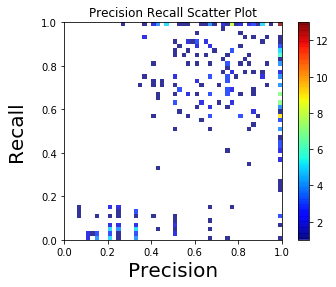

In [50]:
nf.plot()

In [51]:
# Label Propagation vs K-Clique

nf = NF1(lp, kclique8)
results = nf.summary()

results

{'scores':                                Value
 Index                               
 Ground Truth Communities  226.000000
 Identified Communities    859.000000
 Community Ratio             3.800885
 Ground Truth Matched        0.508850
 Node Coverage               2.027923
 NF1                         0.045894,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0    0.04     1.0  0.673689     0.67  0.223901}

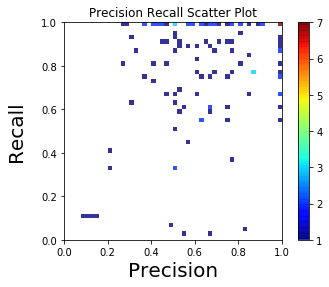

In [52]:
nf.plot()

In [54]:
# K-Clique vs Demon

nf = NF1(kclique8, coms_demon)
results = nf.summary()

results

{'scores':                                 Value
 Index                                
 Ground Truth Communities  2057.000000
 Identified Communities     226.000000
 Community Ratio              0.109869
 Ground Truth Matched         0.463782
 Node Coverage                0.758940
 NF1                          1.061332,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0    0.01     1.0  0.542122      1.0  0.284648}

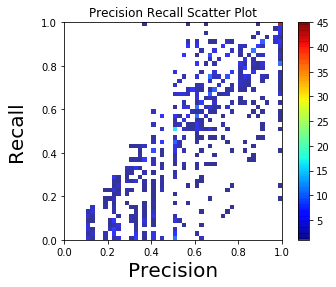

In [55]:
nf.plot()

In [56]:
# K-Clique vs Louvain

nf = NF1(kclique8, coms_louvain)
results = nf.summary()

results

{'scores':                                Value
 Index                               
 Ground Truth Communities  451.000000
 Identified Communities    226.000000
 Community Ratio             0.501109
 Ground Truth Matched        0.073171
 Node Coverage               0.493115
 NF1                         0.001311,
 'details':    F1 min  F1 max  F1 mean  F1 mode    F1 std
 0     0.0     1.0  0.12274     0.02  0.208642}

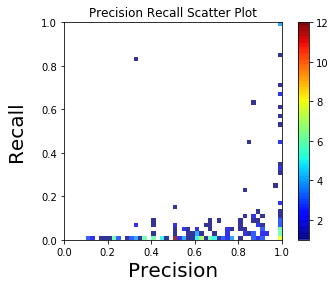

In [57]:
nf.plot()

In [59]:
# Demon vs Louvain

nf = NF1(coms_demon, coms_louvain)
results = nf.summary()

results

{'scores':                                 Value
 Index                                
 Ground Truth Communities   451.000000
 Identified Communities    2057.000000
 Community Ratio              4.560976
 Ground Truth Matched         0.095344
 Node Coverage                0.649742
 NF1                          0.000114,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0     0.0     1.0  0.057414     0.01  0.149662}

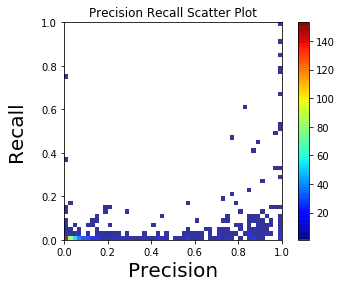

In [60]:
nf.plot()

<a id='lfr'></a>
# 3. LFR: Synthetic networks with planted community structure ([to top](#top))

In [42]:
from networkx.algorithms.community import LFR_benchmark_graph

#### Parameters ####
n = 1000 # number of nodes
tau1 = 3 # Power law exponent for the degree distribution of the created graph
tau2 = 1.5 # Power law exponent for the community size distribution in the created graph.

# checked mu of 0.1 and 0.5

mu = 0.9 # Fraction of intra-community edges incident to each node
###################

lgr_graph = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10)

In [43]:
# Reshaping the communities
ground_truth_communities = [c for c in {tuple(m[1]['community']): None for m in lgr_graph.nodes.data()}]

In [44]:
from networkx.algorithms import community

# Computing a partition (i.e., using Label propagation)
lp_coms_lfr = list(community.label_propagation_communities(lgr_graph))
lp_coms_lfr = [tuple(x) for x in lp_coms_lfr]

In [45]:
# Computing a partition (i.e., using Louvain)
louvain_coms_lfr = list(louvain.best_partition(lgr_graph, resolution=0.9, randomize=True))
louvain_coms_lfr = [tuple(x) for x in lp_coms_lfr]

In [46]:
# Computing a partition (i.e., using K-Clique)
kc_coms_lfr = list(community.k_clique_communities(lgr_graph, 8))
kc_coms_lfr = [tuple(x) for x in lp_coms_lfr]

In [47]:
# Computing a partition (i.e., using Demon)

d = dm.Demon(graph=lgr_graph, min_community_size=6, epsilon=2.3)
#coms_demon = d.execute()

demon_coms_lfr = list(d.execute())
demon_coms_lfr = [tuple(x) for x in lp_coms_lfr]

Exec: 100%|████████████████████████


Time:  'execute' 0.67 sec
------------------------------------


In [48]:
# NMI Preprocessing
lfr_gt = nmi_preprocess(ground_truth_communities)
lp_lfr = nmi_preprocess(lp_coms_lfr)
louvain_lfr = nmi_preprocess(louvain_coms_lfr)

In [49]:
# Computing NMI
normalized_mutual_info_score(lfr_gt, lp_lfr)

C:\Users\qrbal\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.11680378488281012

In [50]:
# Computing NMI
normalized_mutual_info_score(lfr_gt, louvain_lfr)

C:\Users\qrbal\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.11680378488281012

In [51]:
# Computing NF1 (Label Propagation)
nf = NF1(lp_coms_lfr, ground_truth_communities)
results = nf.summary()

results

{'scores':                               Value
 Index                              
 Ground Truth Communities  21.000000
 Identified Communities    30.000000
 Community Ratio            1.428571
 Ground Truth Matched       0.809524
 Node Coverage              1.000000
 NF1                        0.019147,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0    0.02     0.2  0.041739     0.02  0.026483}

In [52]:
# Computing NF1 (Louvain)
nf = NF1(louvain_coms_lfr, ground_truth_communities)
results = nf.summary()

results

{'scores':                               Value
 Index                              
 Ground Truth Communities  21.000000
 Identified Communities    30.000000
 Community Ratio            1.428571
 Ground Truth Matched       0.809524
 Node Coverage              1.000000
 NF1                        0.019147,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0    0.02     0.2  0.041739     0.02  0.026483}

In [53]:
# Computing NF1 (K-Clique)
nf = NF1(kc_coms_lfr, ground_truth_communities)
results = nf.summary()

results

{'scores':                               Value
 Index                              
 Ground Truth Communities  21.000000
 Identified Communities    30.000000
 Community Ratio            1.428571
 Ground Truth Matched       0.809524
 Node Coverage              1.000000
 NF1                        0.019147,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0    0.02     0.2  0.041739     0.02  0.026483}

In [54]:
# Computing NF1 (Demon)
nf = NF1(demon_coms_lfr, ground_truth_communities)
results = nf.summary()

results

{'scores':                               Value
 Index                              
 Ground Truth Communities  21.000000
 Identified Communities    30.000000
 Community Ratio            1.428571
 Ground Truth Matched       0.809524
 Node Coverage              1.000000
 NF1                        0.019147,
 'details':    F1 min  F1 max   F1 mean  F1 mode    F1 std
 0    0.02     0.2  0.041739     0.02  0.026483}

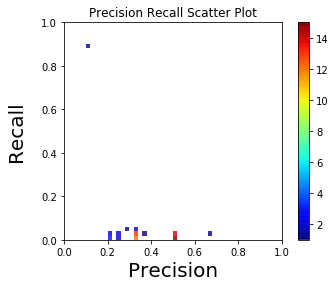

In [55]:
nf.plot()